## Loading Libraries

In [1]:
import os
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from  matplotlib import pyplot 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# from sklearn.datasets import make_classification


## Reading/Loading Data

In [2]:
os.chdir(r"C:\Users\ASTHA\edWisor-Assignment\0. Project\2. Project_2")

In [3]:
os.getcwd()

'C:\\Users\\ASTHA\\edWisor-Assignment\\0. Project\\2. Project_2'

In [4]:
bank_loan_df = pd.read_csv("bank-loan.csv")

# Exploratory data analysis

### Data Exploration

In [5]:
bank_loan_df.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [6]:
bank_loan_df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


### Observation :

<br>
1. Age Age of each customer                      Numerical
<br>2. Education Education categories                Categorical
<br>3. Employment Employment status -                Numerical
    Corresponds to job
    status and being
    converted to numeric
    format
<br>4. Address Geographic area -                     Numerical
    Converted to numeric
    values
<br>5  Income Gross Income of each                   Numerical
    customer
<br>6. debtinc Individual’s debt                     Numerical
    payment to his or her
    gross income
<br>7. creddebt debt-to-credit ratio is a            Numerical
    measurement of how
    much you owe your
    creditors as a
    percentage of your
    available credit (credit
    limits)
<br>8. othdebt Any other debts                       Numerical
<br>9. Default is a Binary value which contains either 0's or 1's to specifically, denoting which are defaulter (having 0's in default column) and which aren't defaulter (having 1's in default column)



In [7]:
bank_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [8]:
bank_loan_df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


## Data Analysis

### Null Values Analysis

In [9]:
# null values present=====> 150 values are missing
#[df["default"].isna()]
bank_loan_df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

### Missing value analysis

In [10]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(bank_loan_df.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(bank_loan_df))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Mising_perc_python.csv", index = False)

In [11]:
#Impute with median -unsure because cannot fill in missing values for them
#df['default'] = df['default'].fillna(df['default'].median())

### Required Operation on Null values

In [12]:
bank_loan_df=bank_loan_df.dropna()
bank_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


## Outlier Analysis

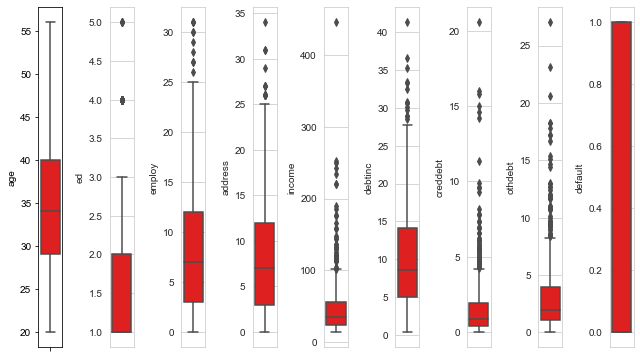

In [13]:
#Plot boxplot to visualize Outliers
%matplotlib inline  
l = bank_loan_df.columns.values
number_of_columns=9
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(bank_loan_df[l[i]],color='red',orient='v')
    plt.tight_layout()


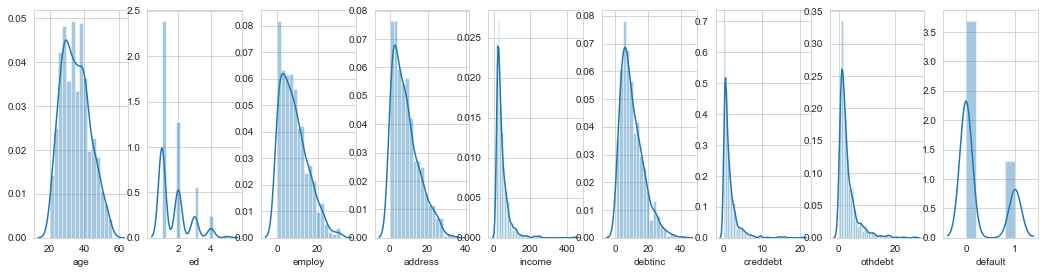

In [14]:
#To check distribution-Skewness
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(bank_loan_df[l[i]],kde=True) 
#All independent variables are right skewed/positively skewed.

In [15]:
#save numeric names
cnames =  ['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default']

# Feature Selection

In [16]:
tm = bank_loan_df.groupby("default").mean()
tm


,age,ed,employ,address,income,debtinc,creddebt,othdebt
default,,,,,,,,
0.0,35.514507,1.659574,9.508704,8.945841,47.154739,8.679304,1.245493,2.773409
1.0,33.010929,1.901639,5.224044,6.393443,41.213115,14.727869,2.423865,3.862807


In [17]:
bank_loan_df.groupby("default")["employ"].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0.0,517.0,9.508704,6.663741,0.0,4.0,9.0,14.0,31.0
1.0,183.0,5.224044,5.542946,0.0,1.0,3.0,8.0,31.0


In [18]:
bank_loan_df.groupby("default")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0.0,517.0,35.514507,7.707736,20.0,29.0,35.0,41.0,56.0
1.0,183.0,33.010929,8.517589,20.0,27.0,31.0,39.0,55.0


In [19]:
bank_loan_df.groupby("default")["ed"].describe()


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0.0,517.0,1.659574,0.904430,1.0,1.0,1.0,2.0,5.0
1.0,183.0,1.901639,0.972788,1.0,1.0,2.0,2.0,5.0


In [20]:
bank_loan_df.groupby("default")["income"].describe() 


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0.0,517.0,47.154739,34.220150,14.0,25.0,36.0,57.0,253.0
1.0,183.0,41.213115,43.115529,14.0,21.0,29.0,45.5,446.0


In [21]:
bank_loan_df.groupby("default")["debtinc"].describe()


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0.0,517.0,8.679304,5.615197,0.4,4.50,7.3,11.80,32.5
1.0,183.0,14.727869,7.902798,0.9,8.55,13.8,19.35,41.3


In [22]:
bank_loan_df.groupby("default")["creddebt"].describe()


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0.0,517.0,1.245493,1.422312,0.011696,0.333312,0.729000,1.606500,9.87660
1.0,183.0,2.423865,3.232522,0.072885,0.543552,1.376844,2.710806,20.56131


In [23]:
bank_loan_df.groupby("default")["othdebt"].describe()


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0.0,517.0,2.773409,2.813939,0.045584,0.99264,1.879790,3.435390,18.26913
1.0,183.0,3.862807,4.263684,0.160983,1.31787,2.529508,4.650975,27.03360


In [24]:
bank_loan_df.groupby("default")["address"].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0.0,517.0,8.945841,7.000621,0.0,3.0,8.0,13.0,34.0
1.0,183.0,6.393443,5.925208,0.0,2.0,5.0,10.0,29.0


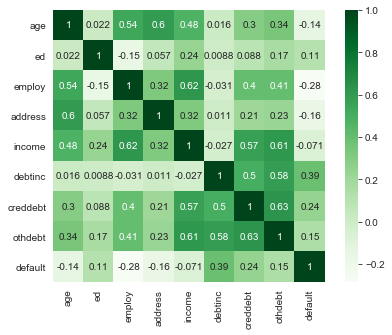

In [25]:
df_corr = bank_loan_df
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))
#Generate correlation matrix
corr = df_corr.corr()
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='Greens',
            square=True,annot= True, ax=ax)
# Dark shades represents positive correlation while lighter shades represents negative correlation.


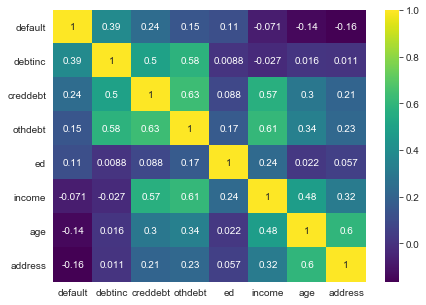

In [26]:
#default correlation matrix
k = 8 #number of variables for heatmap
cols = bank_loan_df.corr().nlargest(k, 'default')['default'].index
cm = bank_loan_df[cols].corr()
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [27]:
bank_loan_df.drop("address", axis="columns", inplace=True)

.# dropping correlated variable

# Separate X and Y

In [28]:
X = bank_loan_df.drop(['default'], axis=1)
y = bank_loan_df['default']

# Modeling 

In [29]:
#dividing data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=200)

In [30]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg =LogisticRegression(penalty='l2', C=0.1)
logreg.fit(X_train,y_train)
#predict new test cases
Log_Predictions = logreg.predict(X_test)
print(logreg.score(X_test,y_test))

0.85


In [31]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, Log_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

print("Defaulted", sum(Log_Predictions!=0))
print("Non-defaulted ", sum(Log_Predictions==0))
#Results
CM

85.0
53.84615384615385
Defaulted 19
Non-defaulted  121


col_0,0.0,1.0
default,,
0.0,107,7
1.0,14,12


0.16666666666666663


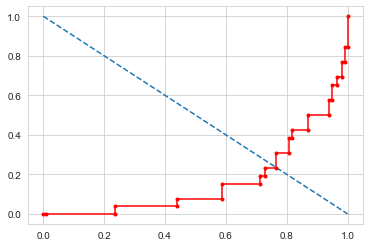

In [32]:
#ROC curve and AUC
prob=logreg.predict_proba(X_test)
# print(prob)
prob=prob[:,0]
auc=roc_auc_score(y_test,prob)
print(auc)
fpr,tpr,thresh=roc_curve(y_test,prob)
plt.plot([0,1],[1,0],linestyle='--')
plt.plot(fpr,tpr,marker='.',color='red',label="Logistic regression")

In [33]:
#Decision Tree
from sklearn import tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

#predict new test cases
C50_Predictions = C50_model.predict(X_test)

In [34]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, C50_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

print("Defaulted", sum(C50_Predictions!=0))
print("Non-defaulted ", sum(C50_Predictions==0))
#Results
CM

74.28571428571429
69.23076923076923
Defaulted 26
Non-defaulted  114


col_0,0.0,1.0
default,,
0.0,96,18
1.0,18,8


0.4251012145748988


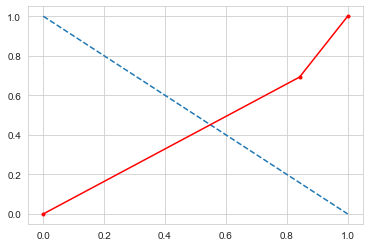

In [35]:
#ROC curve and AUC
prob=C50_model.predict_proba(X_test)
# print(prob)
prob=prob[:,0]
auc=roc_auc_score(y_test,prob)
print(auc)
fpr,tpr,thresh=roc_curve(y_test,prob)
plt.plot([0,1],[1,0],linestyle='--')
plt.plot(fpr,tpr,marker='.',color='red')

In [36]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 200).fit(X_train, y_train)

In [37]:
RF_Predictions = RF_model.predict(X_test)

In [38]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, RF_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print("Accuracy score      : "+str(((TP+TN)*100)/(TP+TN+FP+FN)))

#False Negative rate 
print("False Negative rate : "+ str((FN*100)/(FN+TP)))

print("Defaulted", sum(RF_Predictions!=0))
print("Non-defaulted ", sum(RF_Predictions==0))
CM

Accuracy score      : 84.28571428571429
False Negative rate : 61.53846153846154
Defaulted 16
Non-defaulted  124


col_0,0.0,1.0
default,,
0.0,108,6
1.0,16,10


0.1567139001349528


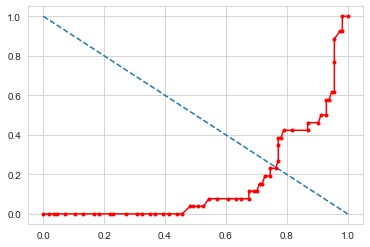

In [39]:
#ROC curve and AUC
prob=RF_model.predict_proba(X_test)
# print(prob)
prob=prob[:,0]
auc=roc_auc_score(y_test,prob)
print(auc)
fpr,tpr,thresh=roc_curve(y_test,prob)
plt.plot([0,1],[1,0],linestyle='--')
plt.plot(fpr,tpr,marker='.',color='red')

In [40]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train, y_train)

In [41]:
#predict test cases
NB_Predictions = NB_model.predict(X_test)

In [42]:
#Build confusion matrix
CM = pd.crosstab(y_test, NB_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
# accuracy_score(y_test, y_pred)*100
print("Accuracy score      : "+str(((TP+TN)*100)/(TP+TN+FP+FN)))

#False Negative rate 
print("False Negative rate : "+ str((FN*100)/(FN+TP)))

print("Defaulted           : ", sum(NB_Predictions!=0))
print("Non-defaulted       : ", sum(NB_Predictions==0))
CM

Accuracy score      : 81.42857142857143
False Negative rate : 76.92307692307692
Defaulted           :  12
Non-defaulted       :  128


col_0,0.0,1.0
default,,
0.0,108,6
1.0,20,6


0.21120107962213228


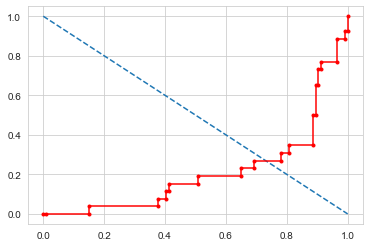

In [43]:
#ROC curve and AUC
prob=NB_model.predict_proba(X_test)
# print(prob)
prob=prob[:,0]
auc=roc_auc_score(y_test,prob)
print(auc)
fpr,tpr,thresh=roc_curve(y_test,prob)
plt.plot([0,1],[1,0],linestyle='--')
plt.plot(fpr,tpr,marker='.',color='red')

In [44]:
#XGB classifier
from xgboost import XGBClassifier
XG_model = XGBClassifier(n_estimators = 200).fit(X_train, y_train)

In [45]:
XG_Predictions = XG_model.predict(X_test)

In [46]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, XG_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print("Accuracy score      : "+str(((TP+TN)*100)/(TP+TN+FP+FN)))

#False Negative rate 
print("False Negative rate : "+ str((FN*100)/(FN+TP)))

print("Defaulted           : ", sum(XG_Predictions!=0))
print("Non-defaulted       : ", sum(XG_Predictions==0))
CM

Accuracy score      : 82.85714285714286
False Negative rate : 53.84615384615385
Defaulted           :  22
Non-defaulted       :  118


col_0,0.0,1.0
default,,
0.0,104,10
1.0,14,12


0.21120107962213228


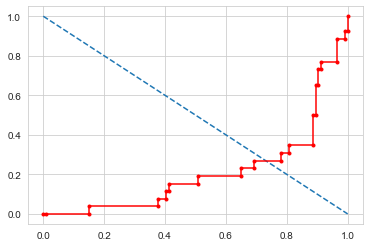

In [47]:
#ROC curve and AUC
prob=NB_model.predict_proba(X_test)
# print(prob)
prob=prob[:,0]
auc=roc_auc_score(y_test,prob)
print(auc)
fpr,tpr,thresh=roc_curve(y_test,prob)
plt.plot([0,1],[1,0],linestyle='--')
plt.plot(fpr,tpr,marker='.',color='red')

# ROC and AUC curves

<b>AUC = 1   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ROC touches (0,1)<br>
       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= 0.5 &nbsp;&nbsp;&nbsp;ROC diagonal line<br>
       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= 0   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ROC touches (1,0) </b>